1. screen capture
2. generate dataset and load it
3. fit the model using svc and calculate accuracy
4. prediction of image drawn in paint

# screen capture

In [ ]:
def one_time():    
    import pyscreenshot as ImageGrab
    import time
    images_folder = "captured_images/0/"
    for i in range (0,5):
        time.sleep(10)
        im = ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1 x2 y2
        print("saved...",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen now and redraw now....")

saved... 0
clear screen now and redraw now....
saved... 1
clear screen now and redraw now....


# generate dataset

In [7]:
import cv2
import csv
import glob

header = ["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray=cv2.GaussianBlur(im_gray,(15,15),0)
        roi=cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)
        
        data=[]
        data.append(label)
        rows,cols = roi.shape
        
        ##add pixel one by one into data array
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)    
        with open('dataset.csv','a') as f:
            writer = csv.writer(f)
            writer.writerow(data)     


# Load the dataset

In [8]:
import pandas as pd
from sklearn.utils import shuffle
data =pd.read_csv('dataset.csv')
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
809,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
708,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
984,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
813,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
712,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Fit the model and find accuracy using svc

In [10]:
X = data.drop(["label"],axis=1)
Y =data["label"]

# preview of one image using matplotlib

0


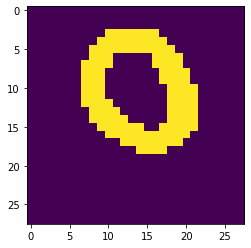

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 12 
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# train and test split

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)

# fit the model using svc and also to save the model using joblib

In [13]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier,"model/digit_recognizer")

['model/digit_recognizer']

# Calculate accuracy

In [14]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy=",metrics.accuracy_score(prediction,test_y))

Accuracy= 0.835


# Prediction of image drawn in paint

In [ ]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model=joblib.load("model/digit_recognizer")
images_folder="img/"

while True:
    img = ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1 x2 y2
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray=cv2.GaussianBlur(im_gray,(15,15),0)
    
    #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100,255,cv2.THRESH_BINARY)
    roi=cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)
        
    rows,cols = roi.shape
    
    X = []
    
    #Adding pixel one by one into data array
    for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                X.append(k)
    predictions = model.predict([X])  
    print("predictions:",predictions[0])
    cv2.putText(im,"Prediction is:"+str(predictions[0]),(20,20),0,0.8,(0,255,0),2,cv2.LINE_AA)
    
    cv2.startWindowThread()
    cv2.namedWindow("Results")
    cv2.imshow("Results",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1) == 13: #27 is the acsii value of escape key, 13 ascii value of enter
        break
    cv2.destroyAllWindows()   

predictions: 1
predictions: 1
predictions: 1
predictions: 8
predictions: 8
predictions: 8
predictions: 8
predictions: 8
predictions: 8
predictions: 8
